In [1]:
from analysis_lib import *
from itertools import product
from functools import reduce
import pandas as pd

# numbers for data sources
sources = {
    "accidents": 0,
    "subways": 1,
    "sounds": 2,
    "taxis": 3,
    "all": None,
    "norm-all": None
}


def select(kind):
    '''Puts 24D vectors corresponding to the hourly frequency of events 
    of a specified type for each day into the global points list, along
    with their corresponding dates (using Day objects).
    '''
    global points
    selection = [sources[kind]]
    points = [i for i in cached if i.source in selection]


HBox(children=(IntProgress(value=0, max=182946), HTML(value='')))

HBox(children=(IntProgress(value=0, max=10129604), HTML(value='')))

HBox(children=(IntProgress(value=0, max=103475), HTML(value='')))

HBox(children=(IntProgress(value=0, max=33022840), HTML(value='')))

In [2]:
from datetime import datetime as dt
import re

# Get given vectors
select('accidents')
# Use percipitation data
weather = 'PRCP'
year = points[0].date.split(' ')[2]
print(year)
# Get weather data from year
df = pd.read_csv('resources/weather.csv')
percips = df[['DATE',weather]].loc[df.DATE.str.startswith(year)]
print(df.loc[0])
# Parse and sort times
percips = np.array(sorted([(dt.strptime(a, '%Y-%m-%d'), b) for _, a, b in percips.itertuples()]))
data = np.array(sorted([(dt.strptime(a.date, '%m %d %Y'), sum(a.vec)) for a in points]))


2015
STATION                      USW00094728
NAME         NY CITY CENTRAL PARK, NY US
LATITUDE                          40.779
LONGITUDE                       -73.9693
ELEVATION                           42.7
DATE                          2012-01-01
AWND                                6.04
PGTM                                 NaN
PRCP                                0.05
SNOW                                   0
SNWD                                   0
TAVG                                 NaN
TMAX                                  52
TMIN                                  41
TSUN                                 NaN
WDF2                                 150
WDF5                                 150
WSF2                                  15
WSF5                                21.9
Name: 0, dtype: object


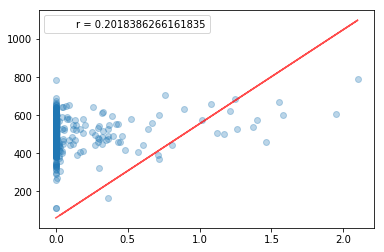

In [3]:
from math import sqrt
import itertools
from matplotlib.patches import Rectangle

# Plot two datasets against each other
scatpts = [(a, b) for (_, a), (_, b) in zip(percips, data)]
            
a, b = np.polyfit(*zip(*scatpts), 1)
r = np.corrcoef(*zip(*scatpts))[1, 0]
extra = Rectangle((0, 0), 1, 1, fc="w", fill=False, edgecolor='none', linewidth=0)
fit = [a + b * i for i in list(zip(*scatpts))[0]]
plt.figure()
plt.legend([extra], [f"r = {r}"])
plt.scatter(*zip(*scatpts), alpha=0.3)
plt.plot(list(zip(*scatpts))[0], fit, color="r", alpha=0.7)
plt.show()